In [1]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [2]:
"""
Utils for the rest of the work
"""

import math

def rotation_matrix(angle):
    """
    The technique to find the content of the matrix is easy:
    - try to map the point (x,y) = (1,0)
    - try to map the point (x,y) = (0,1)
    - make sure the determinant is 1 (cos 2 + sin 2)
    """
    return np.array([
        [math.cos(angle), -1 * math.sin(angle)],
        [math.sin(angle), math.cos(angle)]])

def apply_rotation(x, y, rad):
    M = rotation_matrix(rad)
    coords = np.stack((x, y), axis=-1) # Zip
    coords = np.matmul(coords, np.transpose(M)) # Why does it work ? Shouldn't it be the other way around?
    x, y = np.split(coords, 2, axis=-1) # Unzip
    return np.squeeze(x, axis=-1), np.squeeze(y, axis=-1)

Show the effect of increasing learning rates


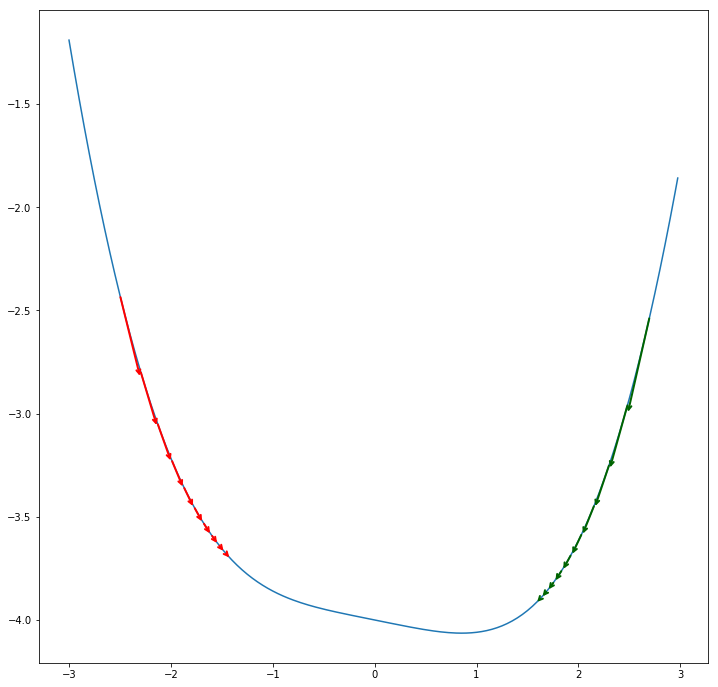

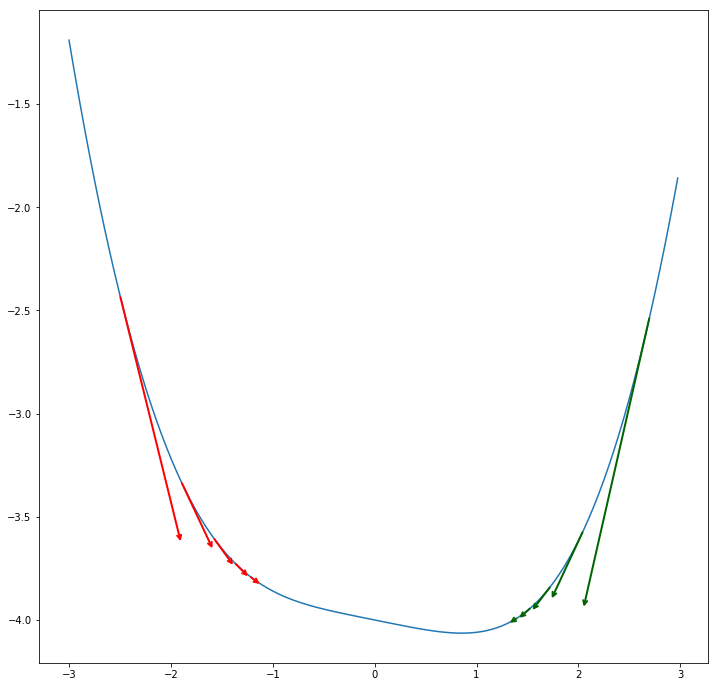

Show the effect of the clipping gradient


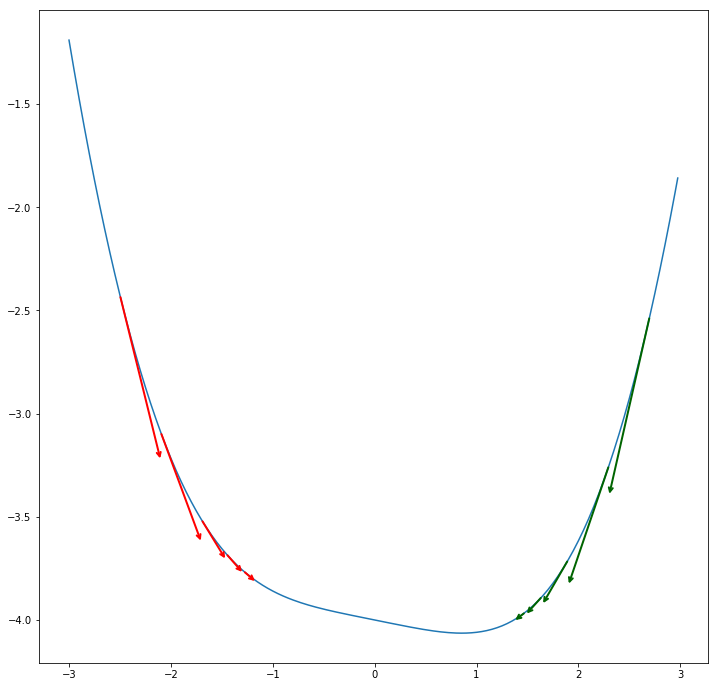

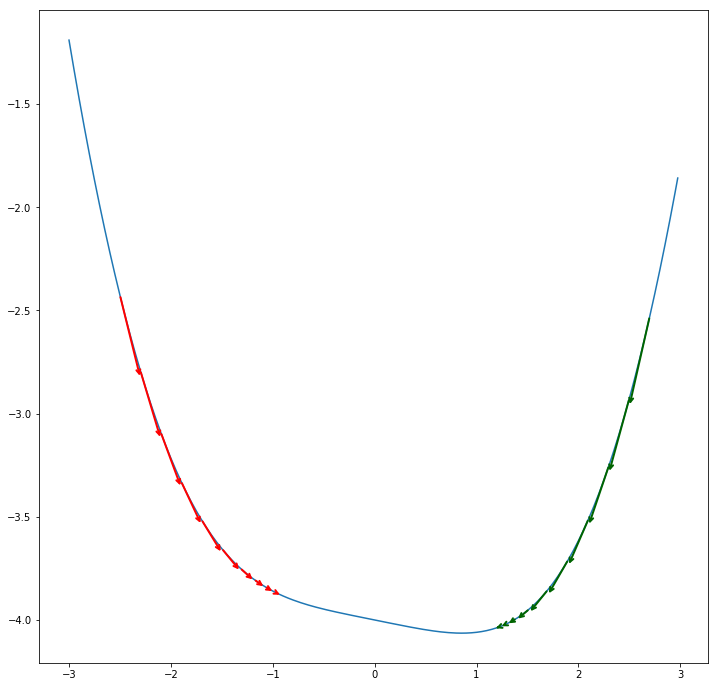

Increasing the learning rate but clipping the gradient: a good trade-off


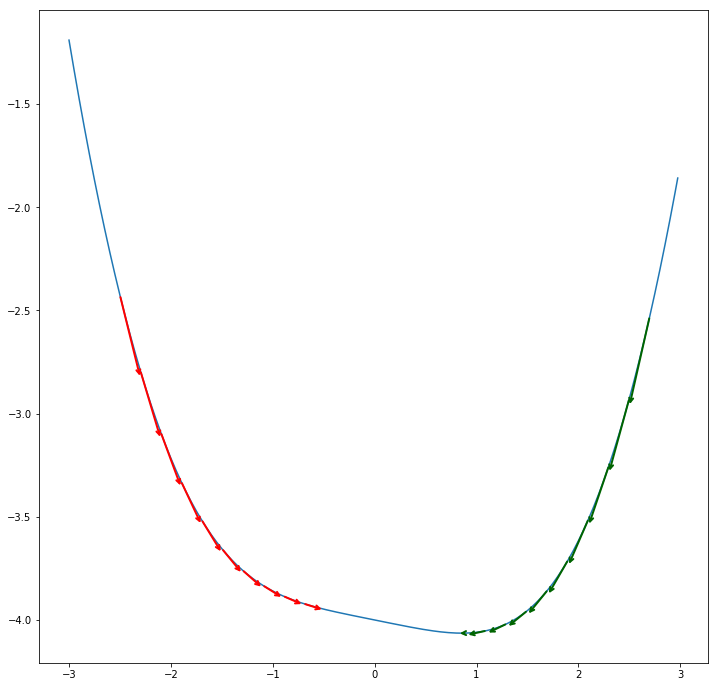

Show the newton method


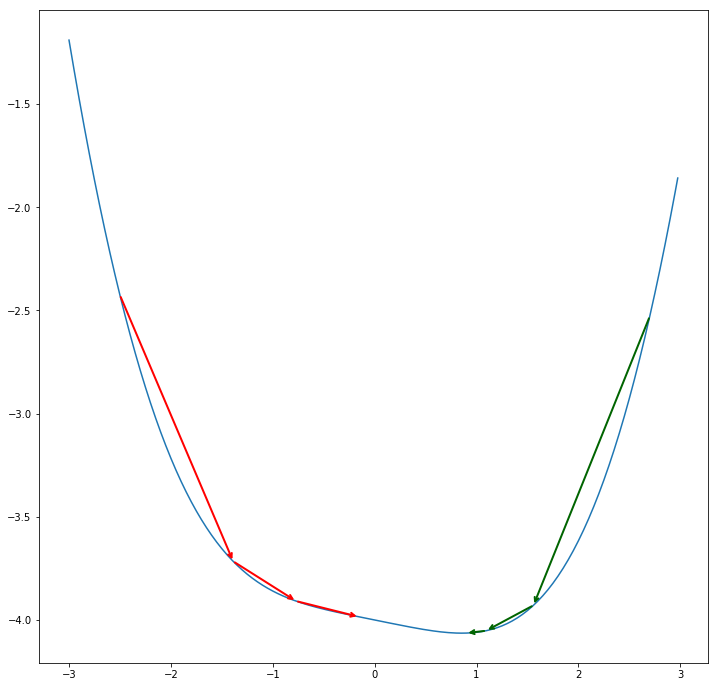

In [22]:
"""
Create a simple 1D curve and show:
1) what a gradient descent would do
2) what newton's method would do
"""

def f_at(x):
    return np.cos(x) + 0.5 * x ** 2 - 0.1 * x - 5

def derivative_at(x):
    return -np.sin(x) + x - 0.1

def double_derivative_at(x):
    return -np.cos(x) + 1

x = np.arange(-3.0, 3.0, 0.025)
fx = f_at(x)

def show_gradient_descent(lr: float,
                          iteration_count: int,
                          step_clipping: float = 0.0):
    # Display the graph of the contours of the function F in terms of X and Y
    fig, ax = plt.subplots(figsize=(12, 12))
    CS = ax.plot(x, fx)

    # Display the gradiants from a bunch of starting points
    colors = ['red', 'darkgreen']
    curr_x = np.array([-2.5, 2.7])
    curr_y = f_at(curr_x)
    for _ in range(iteration_count):
        grad = derivative_at(curr_x)
        step = lr * grad
        if step_clipping > 0.:
            step = np.where(np.abs(step) <= step_clipping, step, step_clipping / np.abs(step) * step)
        next_x = curr_x - step
        next_y = curr_y + grad * (next_x - curr_x)
        for i in range(len(curr_x)):
            src = curr_x[i], curr_y[i]
            dst = next_x[i], next_y[i]
            ax.annotate('', xy=dst, xytext=src, arrowprops={'arrowstyle': '->', 'color': colors[i], 'lw': 2})
        curr_x = next_x
        curr_y = f_at(curr_x)

    # Show the whole thing
    # ax.set_axis_off()
    plt.show()

def show_newton_method(iteration_count: int):
    # Display the graph of the contours of the function F in terms of X and Y
    fig, ax = plt.subplots(figsize=(12, 12))
    CS = ax.plot(x, fx)
    
    # Display the iterations of newton from a bunch of starting points
    colors = ['red', 'darkgreen']
    curr_x = np.array([-2.5, 2.7])
    curr_y = f_at(curr_x)
    for _ in range(iteration_count):
        next_x = curr_x - derivative_at(curr_x) / double_derivative_at(curr_x)
        next_y = f_at(next_x)
        for i in range(len(curr_x)):
            src = curr_x[i], curr_y[i]
            dst = next_x[i], next_y[i]
            ax.annotate('', xy=dst, xytext=src, arrowprops={'arrowstyle': '->', 'color': colors[i], 'lw': 2})
        curr_x = next_x
        curr_y = f_at(curr_x)
    
    # Show the whole thing
    # ax.set_axis_off()
    plt.show()
    
print('Show the effect of increasing learning rates')
show_gradient_descent(lr=0.1, iteration_count=10)
show_gradient_descent(lr=0.3, iteration_count=5)

print('Show the effect of the clipping gradient')
show_gradient_descent(lr=0.3, iteration_count=5, step_clipping=0.4)
show_gradient_descent(lr=0.3, iteration_count=10, step_clipping=0.2)

print('Increasing the learning rate but clipping the gradient: a good trade-off')
show_gradient_descent(lr=5.0, iteration_count=10, step_clipping=0.2)

print('Show the newton method')
show_newton_method(iteration_count=3)

We still need a learning rate with Newton's method


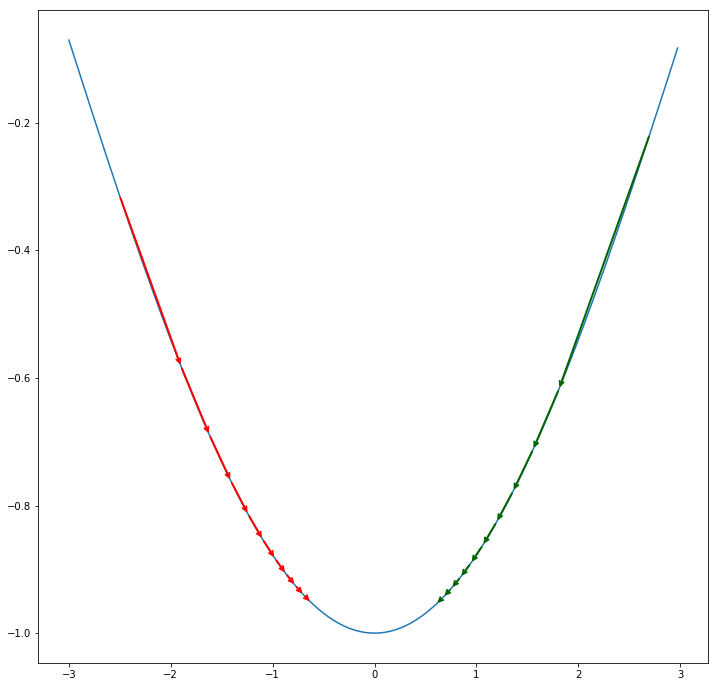

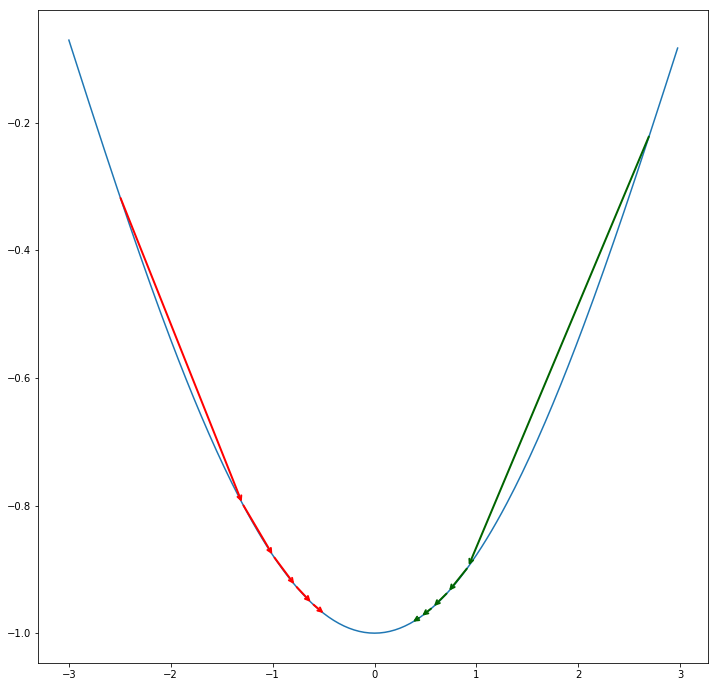

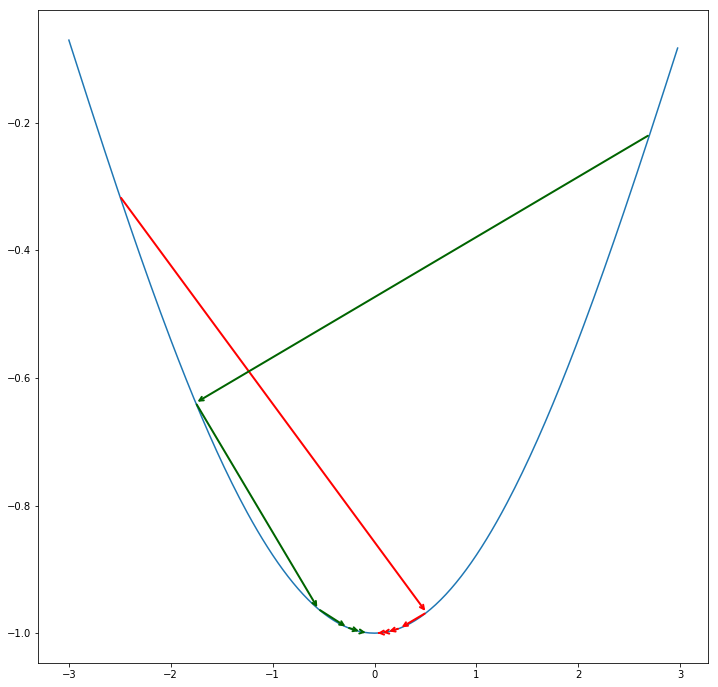

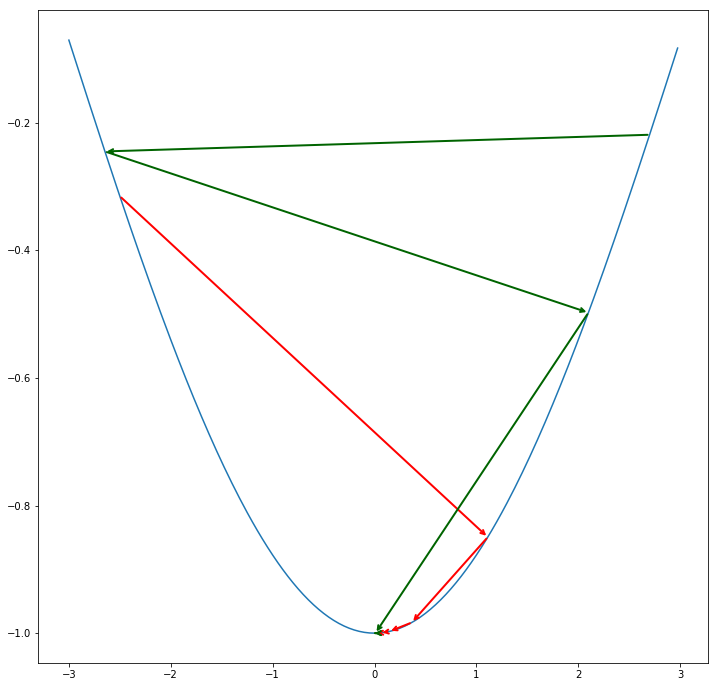

In [61]:
"""
When Newton's method has a problem
"""

def f_at(x):
    return - np.cos(x / 2)

def derivative_at(x):
    return 0.5 * np.sin(x / 2)

def double_derivative_at(x):
    return 0.25 * np.cos(x / 2)

x = np.arange(-3.0, 3.0, 0.025)
fx = f_at(x)

def show_newton_method(lr: float, iteration_count: int):
    # Display the graph of the contours of the function F in terms of X and Y
    fig, ax = plt.subplots(figsize=(12, 12))
    CS = ax.plot(x, fx)
    
    # Display the iterations of newton from a bunch of starting points
    colors = ['red', 'darkgreen']
    curr_x = np.array([-2.5, 2.7])
    curr_y = f_at(curr_x)
    for _ in range(iteration_count):
        step = derivative_at(curr_x) / double_derivative_at(curr_x)
        next_x = curr_x - lr * step
        next_y = f_at(next_x)
        for i in range(len(curr_x)):
            src = curr_x[i], curr_y[i]
            dst = next_x[i], next_y[i]
            ax.annotate('', xy=dst, xytext=src, arrowprops={'arrowstyle': '->', 'color': colors[i], 'lw': 2})
        curr_x = next_x
        curr_y = f_at(curr_x)
    
    # Show the whole thing
    # ax.set_axis_off()
    plt.show()

print("We still need a learning rate with Newton's method")
show_newton_method(lr=0.1, iteration_count=10)
show_newton_method(lr=0.2, iteration_count=5)
show_newton_method(lr=0.5, iteration_count=5)
show_newton_method(lr=0.6, iteration_count=5)

Show the effect of increasing learning rates


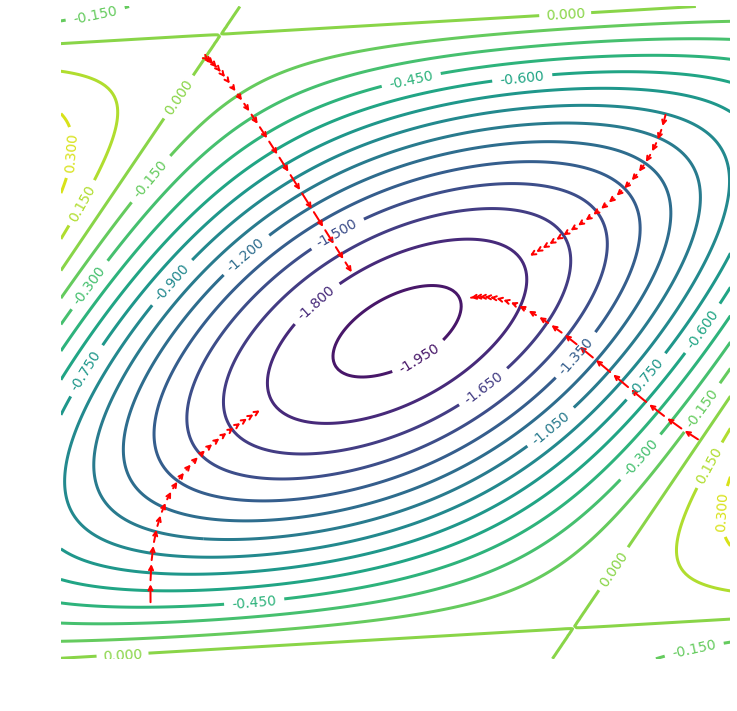

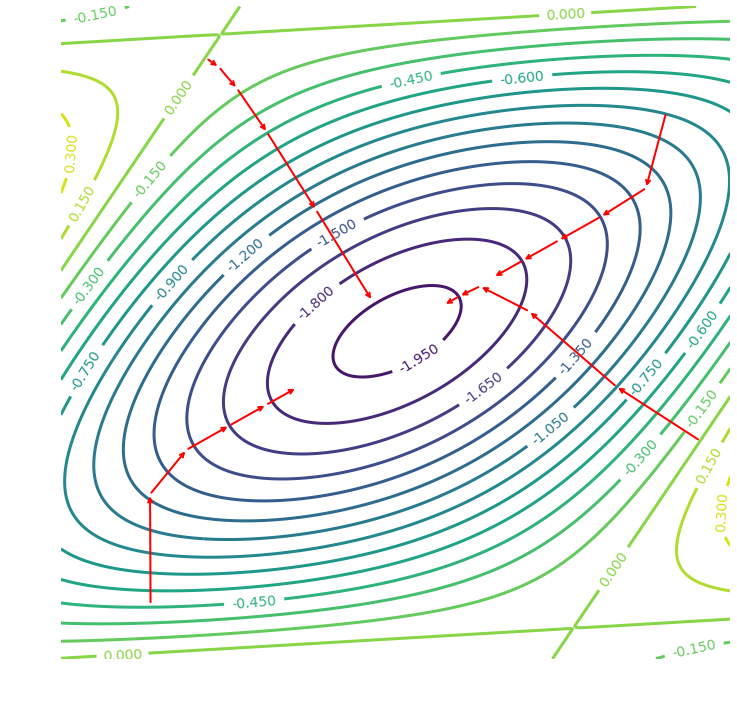

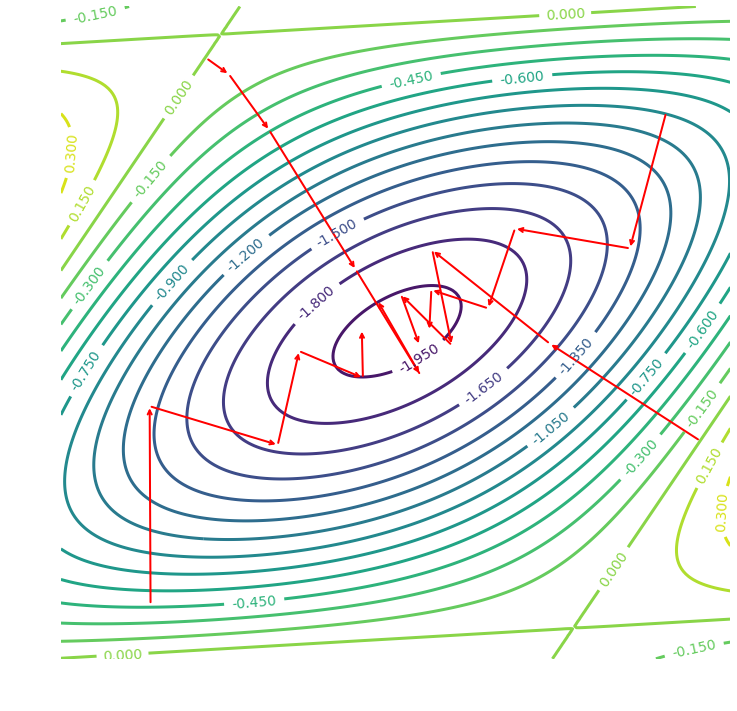

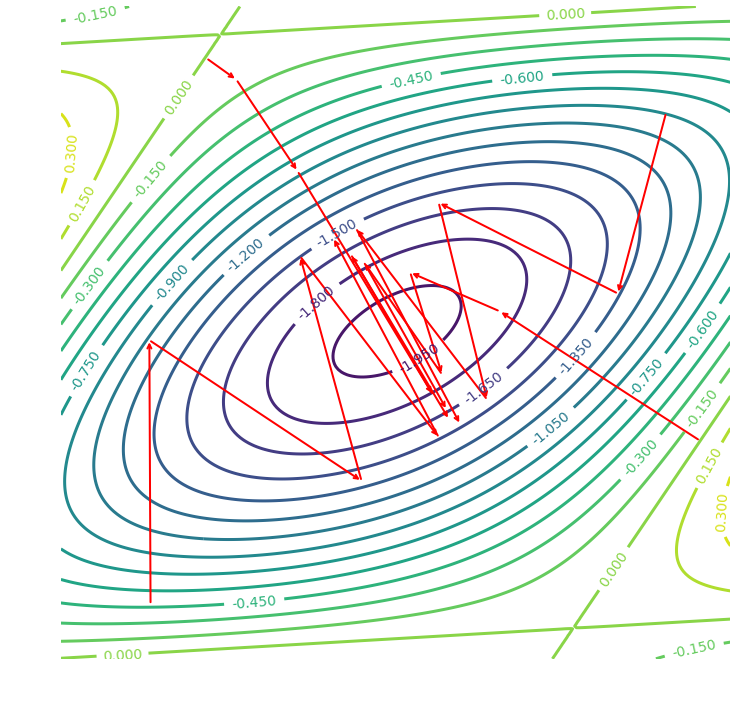

Show the effect of the clipping gradient


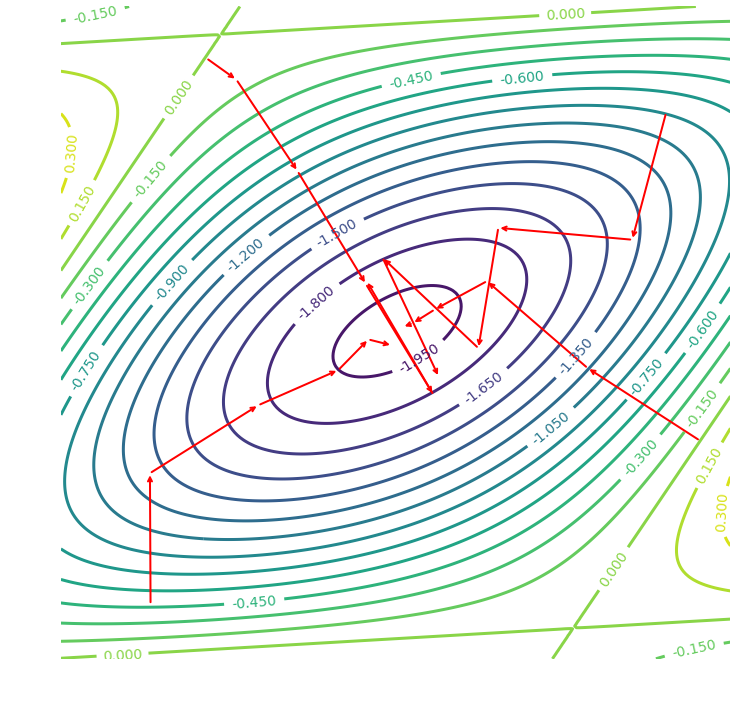

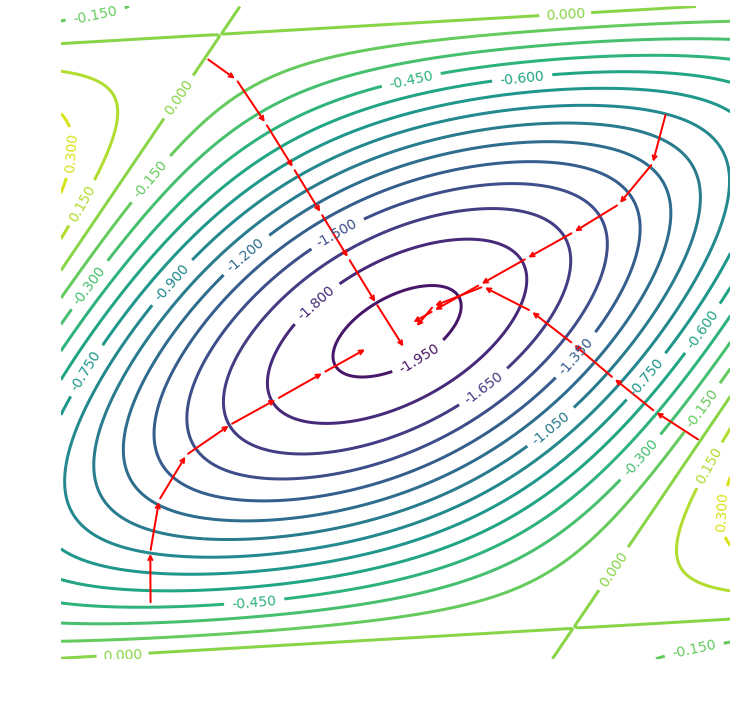

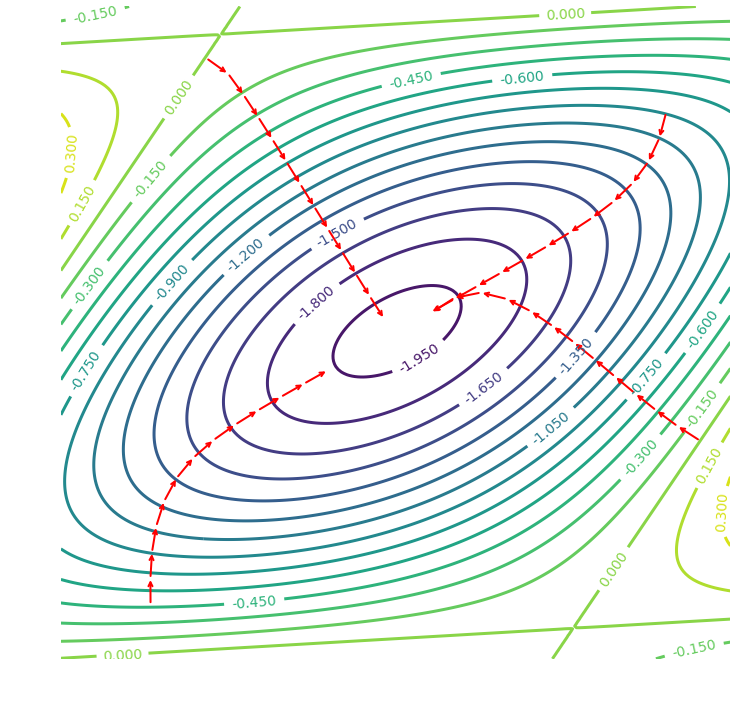

In [34]:
"""
Create a simple 2D curve and show:
1) what a gradient descent would do:
    * what the effect of the learning rate is
    * what the effect of gradient clipping is
2) what newton's method would do
"""

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)

# Computing the function F as a rotation followed by sinusoids
rotation_rad = - math.pi / 6
U, V = apply_rotation(X, Y, rad=rotation_rad)
F = - np.cos(U / 2) - np.cos(V)

def gradient_at(x, y):
    """
    Compute the gradient of the function F(x, y) at the position (x, y)
    """
    theta = rotation_rad
    u, v = apply_rotation(x, y, rad=theta)
    df_du = 0.5 * np.sin(u * 0.5)
    df_dv = np.sin(v)
    # That would be the chain rule: it is just a rotation in other direction
    # du_dx = math.cos(theta)
    # du_dy = - math.sin(theta)
    # dv_dx = math.sin(theta)
    # dv_dy = math.cos(theta)
    # df_dx = df_du * du_dx + df_dv * dv_dx
    # df_dy = df_du * du_dy + df_dv * dv_dy
    df_dx, df_dy = apply_rotation(df_du, df_dv, rad=-theta)
    return np.stack((df_dx, df_dy), axis=-1)

def clip_grad(grad, grad_clipping_val: float):
    """
    Clip the gradient of all vectors to be at most 'grad_clipping_val'
    """
    norms = np.apply_along_axis(lambda g: np.dot(g, g), -1, grad)    
    clipped_norms = np.where(
        norms <= grad_clipping_val * grad_clipping_val,
        norms,
        grad_clipping_val * grad_clipping_val)
    # Transpose is needed to work with the broadcasting
    clipped = np.sqrt(clipped_norms) / np.sqrt(norms) * np.transpose(grad)
    return np.transpose(clipped)

# TODO - factorize both approach (newton and gradient) below: they only differ by how you make the step

def show_gradient_descent(lr: float,
                          iteration_count: int,
                          grad_clipping: float = 0.0):
    # Display the graph of the contours of the function F in terms of X and Y
    fig, ax = plt.subplots(figsize=(12, 12))
    CS = ax.contour(X, Y, F, levels=20, linewidths=3, antialiased=True)
    ax.clabel(CS, inline=1, fontsize=14)

    # Display the gradiants from a bunch of starting points
    curr_x = np.array([-2.2 ,2.4, -1.7, 2.7])
    curr_y = np.array([-2.5, 2.0, 2.5, -1.0])
    for _ in range(iteration_count):
        grad = gradient_at(curr_x, curr_y)
        if grad_clipping > 0.:
            grad = clip_grad(grad, grad_clipping)
        next_x = curr_x - lr * grad[:,0]
        next_y = curr_y - lr * grad[:,1]
        for i in range(len(curr_x)):
            src = curr_x[i], curr_y[i]
            dst = next_x[i], next_y[i]
            ax.annotate('', xy=dst, xytext=src, arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 2})
        curr_x, curr_y = next_x, next_y

    # Show the whole thing
    ax.set_axis_off()
    plt.xlabel('X1', fontsize=18, labelpad=10)
    plt.ylabel('X2', fontsize=18, rotation=0, labelpad=20)
    plt.show()
    
print('Show the effect of increasing learning rates')
show_gradient_descent(lr=0.2, iteration_count=20)
show_gradient_descent(lr=1.0, iteration_count=5)
show_gradient_descent(lr=1.8, iteration_count=5)
show_gradient_descent(lr=2.4, iteration_count=5)

print('Show the effect of the clipping gradient')
show_gradient_descent(lr=2.4, grad_clipping=0.5, iteration_count=5)
show_gradient_descent(lr=2.4, grad_clipping=0.2, iteration_count=7)
show_gradient_descent(lr=2.4, grad_clipping=0.1, iteration_count=12)

Show the newton method
[-2.2  2.4 -1.7  2.7] [-2.5  2.   2.5 -1. ]
[[-0.06637034 -0.31801549]
 [-0.31801549  0.30084232]]
[[ 0.02831565 -0.48119423]
 [-0.48119423  0.58395089]]
[[-0.06511294  0.53514188]
 [ 0.53514188 -0.68304155]]
[[-0.19990057  0.23179511]
 [ 0.23179511 -0.46755451]]
[-2.25270149  2.44057962 -1.69733378  2.817496  ] [-2.48872394  2.00983379  2.5044771  -0.96284507]
[[-0.05829983 -0.33141104]
 [-0.33141104  0.32438069]]
[[ 0.02947024 -0.48394141]
 [-0.48394141  0.58827765]]
[[-0.06500635  0.53538692]
 [ 0.53538692 -0.68321792]]
[[-0.22650333  0.22856864]
 [ 0.22856864 -0.49043166]]
[-2.30399276  2.48095686 -1.6947259   2.90611359] [-2.47997136  2.01991434  2.50886084 -0.94072388]
[[-0.05070302 -0.34329266]
 [-0.34329266  0.3456972 ]]
[[ 0.03085704 -0.48639656]
 [-0.48639656  0.5924994 ]]
[[-0.06490423  0.53562207]
 [ 0.53562207 -0.68338732]]
[[-0.24632336  0.22837639]
 [ 0.22837639 -0.51002971]]
[-2.35417674  2.52117969 -1.69217488  2.98265255] [-2.47331451  2.0302549

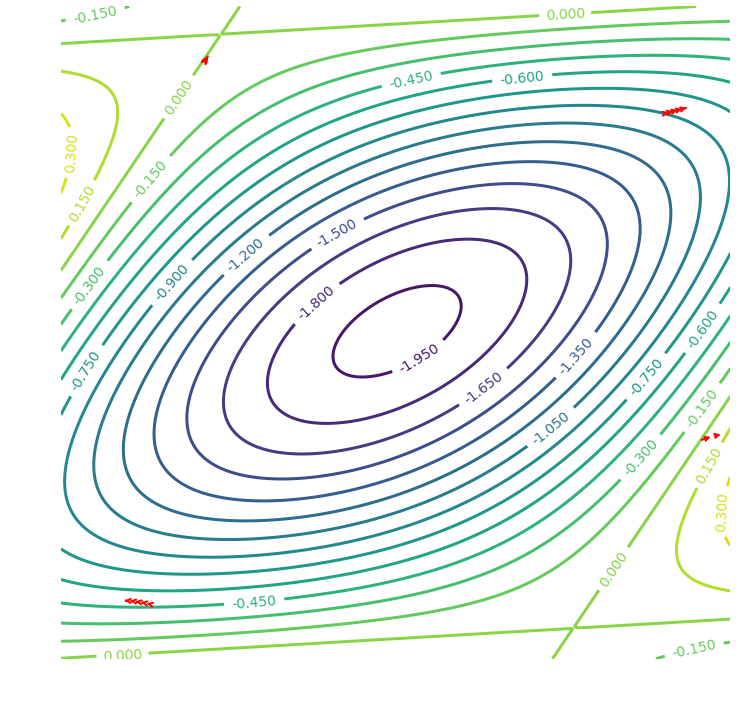

In [39]:
def reversed_hessian_at(x, y):
    """
    Compute the hessian matrix H(x, y) at the position (x, y)
    """
    theta = rotation_rad
    u, v = apply_rotation(x, y, rad=theta)
    
    d2f_dx_dx = 0.25 * np.cos(u) * np.cos(theta) * np.cos(theta)   + np.cos(v) * np.sin(theta) * np.sin(theta)
    d2f_dx_dy = 0.25 * np.cos(u) * np.cos(theta) * -np.sin(theta)  + np.cos(v) * np.sin(theta) * np.cos(theta)
    d2f_dy_dx = 0.25 * np.cos(u) * -np.sin(theta) * np.cos(theta)  + np.cos(v) * np.cos(theta) * np.sin(theta)
    d2f_dy_dy = 0.25 * np.cos(u) * -np.sin(theta) * -np.sin(theta) + np.cos(v) * np.cos(theta) * np.cos(theta)
    
    matrices = []
    for i in range(len(x)):
        m = np.array([
            [d2f_dx_dx[i], d2f_dx_dy[i]],
            [d2f_dy_dx[i], d2f_dy_dy[i]]])
        print(m)
        matrices.append(np.linalg.inv(m))
    return np.stack(matrices)

def show_newton_method(lr: float, iteration_count: int):
    # Display the graph of the contours of the function F in terms of X and Y
    fig, ax = plt.subplots(figsize=(12, 12))
    CS = ax.contour(X, Y, F, levels=20, linewidths=3, antialiased=True)
    ax.clabel(CS, inline=1, fontsize=14)

    # Display the gradiants from a bunch of starting points
    curr_x = np.array([-2.2 ,2.4, -1.7, 2.7])
    curr_y = np.array([-2.5, 2.0, 2.5, -1.0])
    for _ in range(iteration_count):
        print(curr_x, curr_y)
        grad = gradient_at(curr_x, curr_y)
        rev_hessian = reversed_hessian_at(curr_x, curr_y)
        step = np.matmul(rev_hessian, np.expand_dims(grad, axis=-1)).squeeze(axis=-1)
        next_x = curr_x - lr * step[:,0]
        next_y = curr_y - lr * step[:,1]
        for i in range(len(curr_x)):
            src = curr_x[i], curr_y[i]
            dst = next_x[i], next_y[i]
            ax.annotate('', xy=dst, xytext=src, arrowprops={'arrowstyle': '->', 'color': 'red', 'lw': 2})
        curr_x, curr_y = next_x, next_y

    # Show the whole thing
    ax.set_axis_off()
    plt.xlabel('X1', fontsize=18, labelpad=10)
    plt.ylabel('X2', fontsize=18, rotation=0, labelpad=20)
    plt.show()

print('Show the newton method')
show_newton_method(lr=0.02, iteration_count=5)

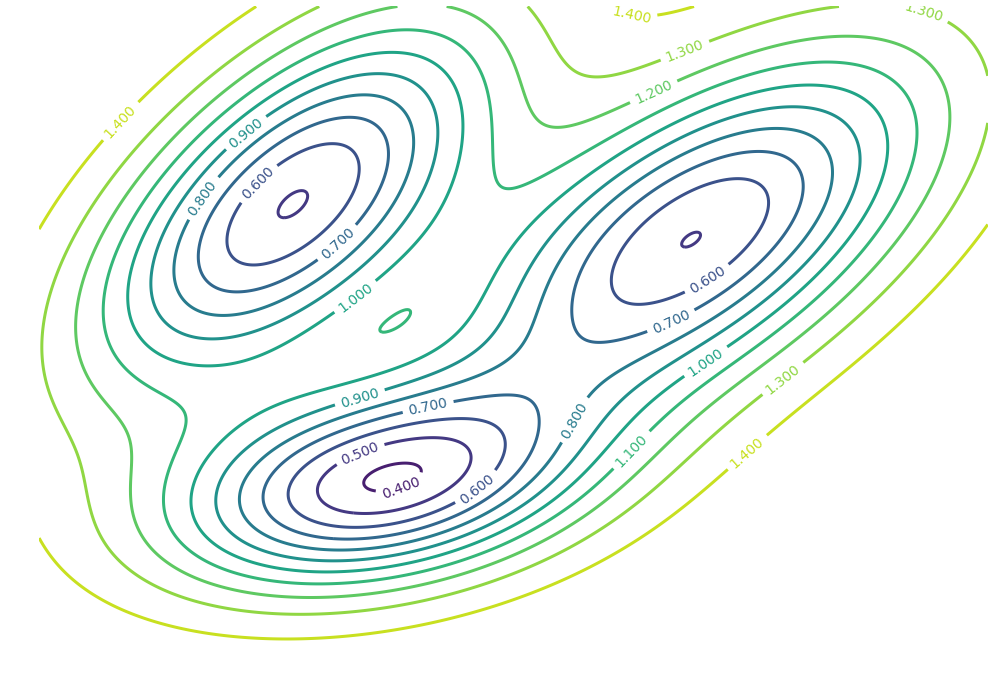

In [13]:
"""
Create a complex 2D curve and show:
1) what a gradient descent would do
2) what newton's method would do
"""

delta = 0.025
x = np.arange(-8.0, 8.0, delta)
y = np.arange(-6.0, 8.0, delta)
X, Y = np.meshgrid(x, y)

Z = 1.5 - np.exp(-(0.01 * (3*(X-2) - Y) ** 2 + 0.01 * (3*(Y-2) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+5) - Y) ** 2 + 0.01 * (3*(Y-5) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+2) - 0.5 * Y) ** 2 + 0.01 * (4*(Y+2) - 0.5 * X) ** 2))

Z = 1.5 - np.exp(-(0.01 * (3*(X-2) - Y) ** 2 + 0.01 * (3*(Y-2) - X) ** 2)) \
        - np.exp(-(0.015 * (3*(X+5) - Y) ** 2 + 0.01 * (3*(Y-5) - X) ** 2)) \
        - np.exp(-(0.01 * (3*(X+2) - 0.5 * Y) ** 2 + 0.015 * (4*(Y+2) - 0.5 * X) ** 2))

fig, ax = plt.subplots(figsize=(17, 12))
CS = ax.contour(X, Y, Z, levels=12, linewidths=3, antialiased=True)
ax.clabel(CS, inline=1, fontsize=14)

# ax.get_xaxis().set_visible(False) # Hide the X axis
# ax.get_yaxis().set_visible(False) # Hide the Y axis
ax.set_axis_off() # Hide the axis

ax.get_xaxis().set_ticks([]) # only hide the labels
ax.get_yaxis().set_ticks([]) # only hide the labels

plt.xlabel('X1', fontsize=18, labelpad=10)
plt.ylabel('X2', fontsize=18, rotation=0, labelpad=20)
# plt.grid(True)
plt.show()

In [124]:
"""
Computation of PI, tuned to batch the random numbers, but not too much to avoid filling memory
"""

n = 100_000_000
b = 10_000

in_circle = 0
for _ in range(n // b):
    xs = np.random.uniform(-1, 1, size=b)
    ys = np.random.uniform(-1, 1, size=b)
    in_circle += np.count_nonzero(xs ** 2 + ys ** 2 <= 1)  # faster than .sum()

pi_approx = 4 * in_circle / n
print(pi_approx)

3.14182804
